<a href="https://colab.research.google.com/github/Mahajan2023/DS-projects/blob/Masters/IpL_Auction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
Tata_ipl=pd.read_csv('/content/ipl_2023_dataset.csv')



In [ ]:
Tata_ipl.head()

,Unnamed: 0,Player Name,Type,Price Cr,Team
0,0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings


In [ ]:
Tata_ipl.describe()

,Unnamed: 0,Price Cr
count,568.000000,243.000000
mean,283.500000,3.746914
std,164.111751,4.584679
min,0.000000,0.200000
25%,141.750000,0.225000
50%,283.500000,1.500000
75%,425.250000,6.375000
max,567.000000,18.500000


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   568 non-null    int64  
 1   Player Name  568 non-null    object 
 2   Type         568 non-null    object 
 3   Price Cr     243 non-null    float64
 4   Team         568 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.3+ KB


In [ ]:
ipl = ipl.drop(['Unnamed: 0'],axis=1)

In [ ]:
ipl.columns

Index(['Player Name', 'Type', 'Price Cr', 'Team'], dtype='object')

In [ ]:
ipl.isnull().sum()

Player Name      0
Type             0
Price Cr       325
Team             0
dtype: int64

In [ ]:
# Price is null because, the players are not sold. Hence, not dealing with nulls

## Exploratory Data analysis

In [ ]:
Tata_ipl.shape

# Teams

In [ ]:
ipl_teams = ipl.Team.value_counts()

In [ ]:
ipl_teams = ipl_teams.reset_index()

In [ ]:
ipl_teams[ipl_teams['Team_name'] != 'Unsold']['Team_name']

1                 Gujarat Titans
2            Chennai Super Kings
3                 Delhi Capitals
4           Lucknow Super Giants
5    Royal Challengers Bangalore
6               Rajasthan Royals
7            Sunrisers Hyderabad
8                 Mumbai Indians
9                   Punjab Kings
Name: Team_name, dtype: object

There are a total of 9 teams participating in the auction

Gujarat Titans
Delhi Capitals
Rajasthan Royals
Royal Challengers Bangalore
Lucknow Super Giants
Sunrisers Hyderabad
Chennai Super Kings
Mumbai Indians
Punjab King

In [ ]:
ipl_teams[ipl_teams['Team_name'] != 'Unsold']

,Team_name,Player_Count
1,Gujarat Titans,47
2,Chennai Super Kings,25
3,Delhi Capitals,25
4,Lucknow Super Giants,25
5,Royal Challengers Bangalore,25
6,Rajasthan Royals,25
7,Sunrisers Hyderabad,25
8,Mumbai Indians,24
9,Punjab Kings,22


In [ ]:
ipl_teams_totalSpending = ipl[['Team','Price Cr']].groupby(['Team'],as_index=False).sum().sort_values('Price Cr',ascending = False)

In [ ]:
ipl_teams_avgSpending

,Team,Price Cr
4,Mumbai Indians,3.956250
2,Gujarat Titans,3.912766
5,Punjab Kings,3.763636
0,Chennai Super Kings,3.740000
7,Royal Challengers Bangalore,3.730000
6,Rajasthan Royals,3.666000
3,Lucknow Super Giants,3.658000
1,Delhi Capitals,3.622000
8,Sunrisers Hyderabad,3.538000
9,Unsold,NaN


Mumbai Indians spent higher amount on each player, followed by Gujarat Titans

In [ ]:
ipl_teams_avgSpending = ipl[['Team','Price Cr']].groupby(['Team'],as_index=False).mean().sort_values('Price Cr',ascending = False)

highest player each team

In [ ]:
ipl_teams_highestPaid = ipl[['Team','Price Cr','Player Name']].groupby(['Team'],as_index=False).agg({'Price Cr':'max','Player Name':'first'}).sort_values('Price Cr',ascending = False)

In [ ]:
ipl_teams_highestPaid[ipl_teams_highestPaid['Team'] != 'Unsold']

,Team,Price Cr,Player Name
5,Punjab Kings,18.50,Sam Curran
4,Mumbai Indians,17.50,Cameron Green
3,Lucknow Super Giants,17.00,KL Rahul
0,Chennai Super Kings,16.25,Ben Stokes
1,Delhi Capitals,16.00,Rishabh Pant
2,Gujarat Titans,16.00,Hardik Pandya
7,Royal Challengers Bangalore,15.00,Virat Kohli
6,Rajasthan Royals,14.00,Sanju Samson
8,Sunrisers Hyderabad,13.25,Harry Brook


In [ ]:
invs_avg = ipl[['Team','Type','Price Cr']].groupby(['Team','Type'],as_index=False).mean()

In [ ]:
invs_avg = invs_avg[invs_avg['Team'] != 'Unsold']

In [ ]:
invs_avg_max = invs_avg[['Team','Price Cr']].groupby(['Team'],as_index=False).agg({'Price Cr':'max'})

In [ ]:
invs_avg_max_joined = pd.merge(invs_avg, invs_avg_max, on = ['Team','Price Cr'], how='right')

In [ ]:
invs_avg_max_joined.sort_values('Price Cr', ascending=False)

,Team,Type,Price Cr
0,Chennai Super Kings,Wicket-Keeper,12.000000
3,Lucknow Super Giants,Wicket-Keeper,11.375000
1,Delhi Capitals,Wicket-Keeper,9.000000
4,Mumbai Indians,Wicket-Keeper,7.725000
8,Sunrisers Hyderabad,Batter,6.133333
2,Gujarat Titans,All-Rounder,5.600000
6,Rajasthan Royals,Batter,5.010000
5,Punjab Kings,All-Rounder,4.778571
7,Royal Challengers Bangalore,Wicket-Keeper,4.450000


In [ ]:
ipl.sort_values('Price Cr',ascending=False).head(5)

,Player Name,Type,Price Cr,Team
146,Sam Curran,All-Rounder,18.50,Punjab Kings
122,Cameron Green,All-Rounder,17.50,Mumbai Indians
97,KL Rahul,Batter,17.00,Lucknow Super Giants
0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
75,Andre Russell,All-Rounder,16.00,Gujarat Titans


In [ ]:
ipl_players_types = ipl['Type'].value_counts()

In [ ]:
ipl_players_types = ipl_players_types.reset_index()
ipl_players_types = ipl_players_types.rename(columns = {'index':'Type','Type':'Headcount'})

In [ ]:
ipl_players_types

,Type,Headcount
0,Bowler,203
1,All-Rounder,187
2,Batter,105
3,Wicket-Keeper,73


<Axes: xlabel='Type', ylabel='Headcount'>

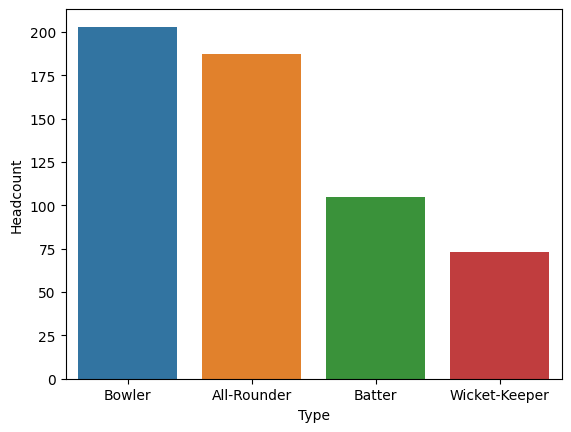

In [ ]:
sns.barplot(x=ipl_players_types.Type,y=ipl_players_types.Headcount)

In [ ]:
typewise_investment = ipl[['Type','Price Cr']].groupby('Type').mean().round

<Axes: >

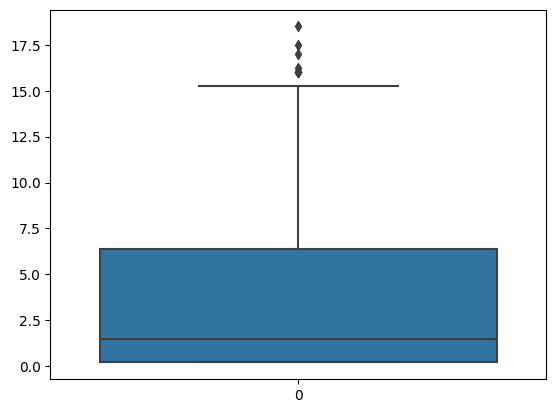

In [ ]:
sns.boxplot(ipl['Price Cr'])

<Axes: >

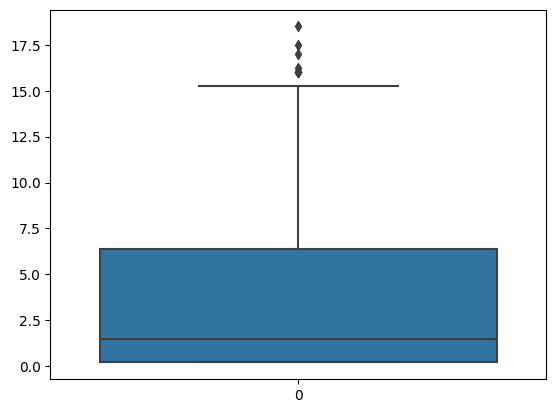

In [ ]:
sns.boxplot(ipl['Price Cr'])

50% of the players are being payed less than 2.5Cr
75% of the players are being payed less than 7.5Cr
5 players are payed exceptionally well (more than 15Cr)